# import libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')
import math
import os



In [8]:
terror = pd.read_csv('globalterrorism.csv',encoding='ISO-8859-1')

In [9]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [10]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [38]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                      'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed', 'nwound':'Wounded','summary':'Summary','gname':'Group','targettype1_txt':'target_type',
                      'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [41]:
terror=terror[['Year','Month','Day','Country','state','Region','AttackType','Target','Killed','Wounded','Summary','Group',
                      'Weapon_type','Motive']]

In [40]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
AttackType          0
Target            636
Killed          10313
Wounded         16311
Summary         66129
Group               0
Weapon_type         0
Motive         131130
dtype: int64

In [25]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   AttackType   181691 non-null  object 
 7   Target       181055 non-null  object 
 8   Killed       171378 non-null  float64
 9   Wounded      165380 non-null  float64
 10  Summary      115562 non-null  object 
 11  Group        181691 non-null  object 
 12  Weapon_type  181691 non-null  object 
 13  Motive       50561 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 19.4+ MB


# main destructive features of data

In [42]:
print("country with most attacks:",terror['Country'].value_counts().idxmax())
print("city with most attacks:",terror['state'].value_counts().index[1])
print("region with most attacks:",terror['Region'].value_counts().idxmax())
print("year with most attacks:",terror['Year'].value_counts().idxmax())
print("month with most attacks:",terror['Month'].value_counts().idxmax())
print("group with most attacks:",terror['Group'].value_counts().index[1])
print(" most attacks types:",terror['AttackType'].value_counts().idxmax())


country with most attacks: Iraq
city with most attacks: Northern Ireland
region with most attacks: Middle East & North Africa
year with most attacks: 2014
month with most attacks: 5
group with most attacks: Taliban
 most attacks types: Bombing/Explosion


# numbers of attack over the Years

In [44]:
print("Year   Number of attacks")
terror['Year'].value_counts(dropna = False).sort_index()


Year   Number of attacks


1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

# data visualisation

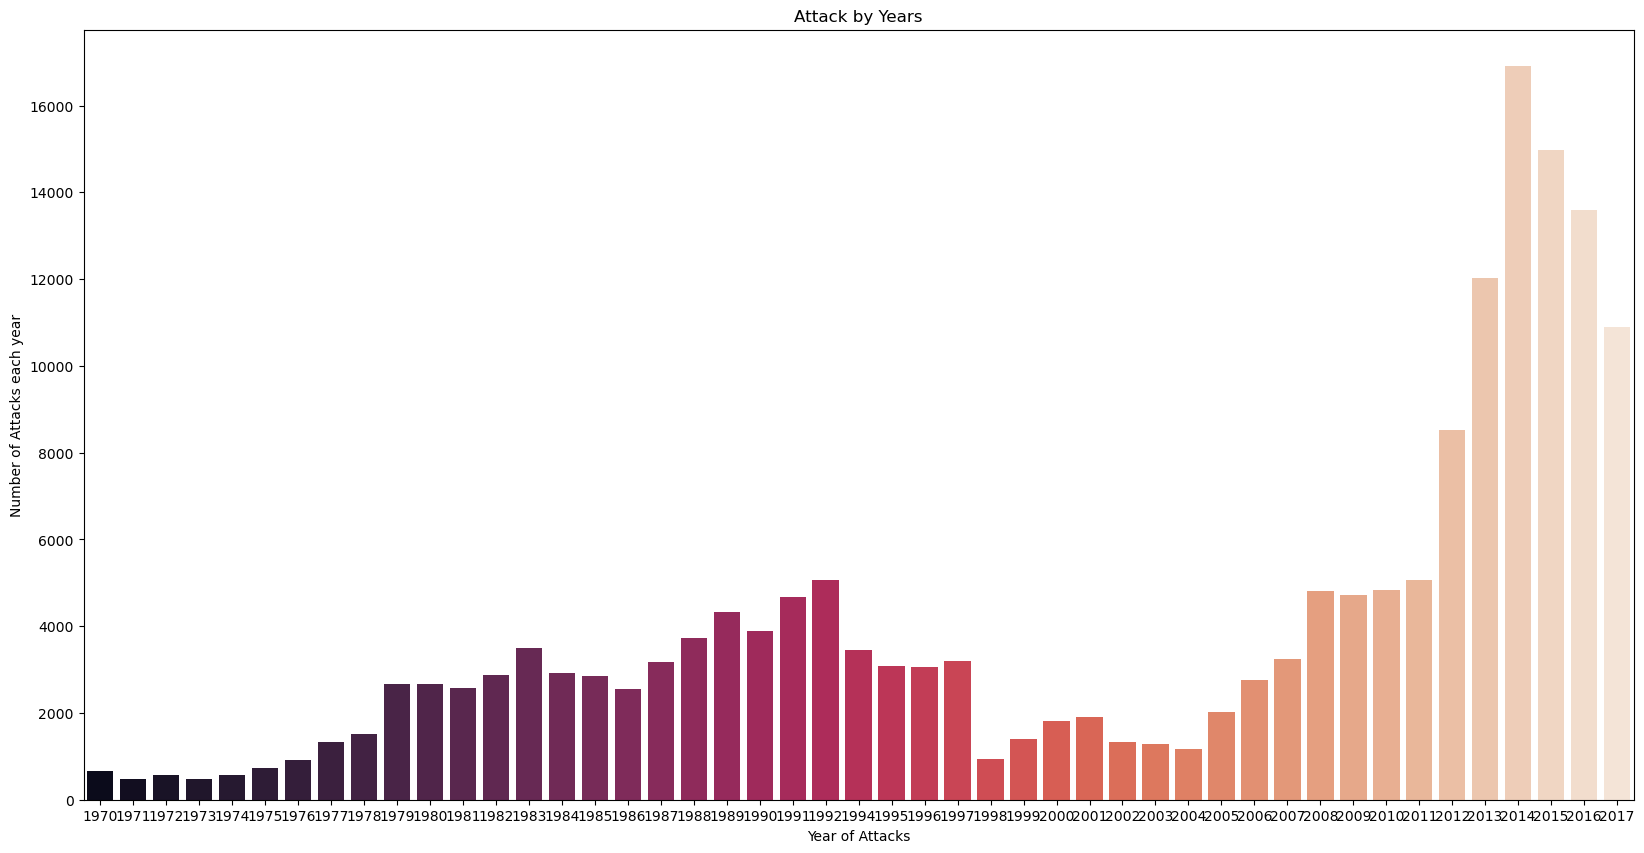

In [47]:
x_year=terror['Year'].unique()
y_yearly_attacks = terror['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize =(20,10))
sns.barplot(x = x_year,
           y=y_yearly_attacks,
           palette='rocket')
plt.xlabel('Year of Attacks')
plt.ylabel('Number of Attacks each year')
plt.title('Attack by Years')
plt.show()

# Terrrorist activities by region in each year

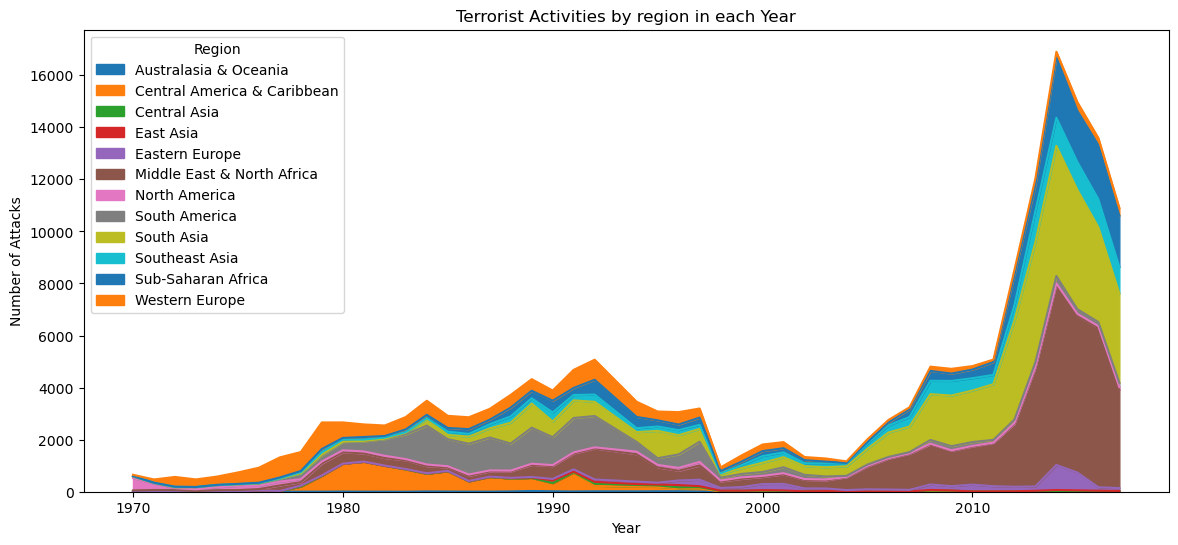

In [48]:
pd.crosstab(terror.Year,terror.Region).plot(kind='area',figsize=(14,6))
plt.title('Terrorist Activities by region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [49]:
terror['wounded']=terror['Wounded'].fillna(0).astype(int)
terror['killed']=terror['Killed'].fillna(0).astype(int)
terror['casualities']=terror['killed']+terror['wounded']

In [50]:
terror1 = terror.sort_values(by='casualities',ascending=False)[:40]
heat=terror.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)
heat.head()

Year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.000000,...,5.852657,5.306163,5.273063,8.232779,5.569775,5.565489,5.770285,6.848029,7.808905,8.570721
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,...,5.392523,3.842593,3.290000,3.933333,3.292683,6.772727,5.153846,2.500000,1.222222,2.214286
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,16.333333,...,0.000000,2.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.666667


In [61]:
 
import plotly.graph_objs as go
import plotly.offline as py

colorscale = [[0, 'white'], [0.3, 'black'], [0.6, 'red'], [1, 'yellow']]

heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 worst terror attacks in history from 1982 to 2016',
    xaxis=dict(ticks='', nticks=20),
    yaxis=dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap', show_link=False)


# Top countries affected by terror attacks

In [62]:
terror.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

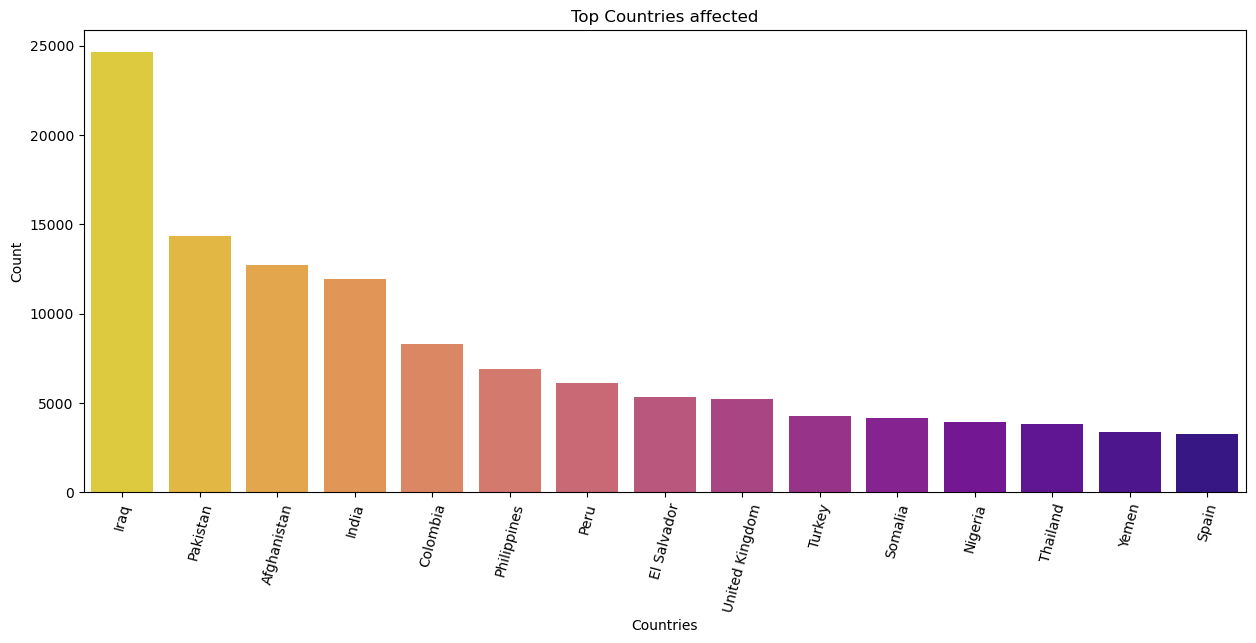

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(15, 6))
sns.barplot(x=terror['Country'].value_counts()[:15].index, y=terror['Country'].value_counts()[:15].values, palette='plasma_r')
plt.title('Top Countries affected')
plt.xlabel('Countries')  
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()
